In [332]:
import matplotlib.pyplot as plt

def plot_runtimes(x, ys, leg_labels, title, figname, inp_size):
    _, ax = plt.subplots()
    ax.plot(x, ys[0], 'x--', label=leg_labels[0], markersize=10)
    ax.plot(x, ys[1], '.--', label=leg_labels[1])
    ax.plot(x, ys[2], 'o--', label=leg_labels[2], fillstyle='none')
    ax.plot(x, ys[3], 'p--', label=leg_labels[3], fillstyle='none')
    ax.set_xscale('log', base=2)
    ax.set_xlabel(f"Number of Processes (log 2 scaled)")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"{title} Time Strong Scaling (Input Size={inp_size})")
    ax.legend()
    plt.savefig(f"plots/strong-time/{figname}.png", dpi=600, bbox_inches="tight")
    plt.show()

In [333]:
import matplotlib.pyplot as plt

def plot_speedup(x, ys, leg_labels, title, sort_level, figname):
    _, ax = plt.subplots()
    ax.plot(x, ys[0], 'x--', label=leg_labels[0], markersize=10)
    ax.plot(x, ys[1], '.--', label=leg_labels[1])
    ax.plot(x, ys[2], 'o--', label=leg_labels[2], fillstyle='none')
    ax.plot(x, ys[3], 'p--', label=leg_labels[3], fillstyle='none')
    ax.plot(x, ys[4], '^--', label=leg_labels[4], fillstyle='none')
    ax.plot(x, ys[5], 's--', label=leg_labels[5], fillstyle='none')
    ax.plot(x, ys[6], 'd--', label=leg_labels[6], fillstyle='none')
    ax.set_xscale('log', base=2)
    ax.set_xlabel(f"Number of Processes (log 2 scaled)")
    ax.set_ylabel("Speedup Factor")
    ax.set_title(f"{title} Speedup Factor Strong Scaling (Sort Level={sort_level})")
    ax.legend()
    plt.savefig(f"plots/strong-speedup/{figname}.png", dpi=600, bbox_inches="tight")
    plt.show()

In [334]:
import matplotlib.pyplot as plt

def plot_runtimes_weak(x_proc, x_elem, ys, labels, title, sort_level, figname):
    _, ax = plt.subplots()
    ax2 = ax.twiny()
    
    ax.plot(x_elem, ys[0], 'x--', label=labels[0], markersize=10)
    ax.plot(x_elem, ys[1], '.--', label=labels[1])
    ax.plot(x_elem, ys[2], 'o--', label=labels[2], fillstyle='none')
    ax.plot(x_elem, ys[3], 'p--', label=labels[3], fillstyle='none')
    
    ax2.plot(x_proc, ys[0], 'x--', label=labels[0], markersize=10, alpha=0)
    ax2.plot(x_proc, ys[1], '.--', label=labels[1], alpha=0)
    ax2.plot(x_proc, ys[2], 'o--', label=labels[2], fillstyle='none', alpha=0)
    ax2.plot(x_proc, ys[3], 'p--', label=labels[3], fillstyle='none', alpha=0)
    
    
    ax.set_xscale('log', base=2)
    ax2.set_xscale('log', base=2)
    ax.set_xlabel("Number of Elements (log 2 scaled)")
    ax2.set_xlabel("Number of Processes (log 2 scaled)")
    
    ax.set_ylabel("Time (s)")
    ax.set_title(f"{title} Time Weak Scaling (Sort Level={sort_level})")
    ax.legend()

    plt.savefig(f"plots/weak/{figname}.png", dpi=600, bbox_inches="tight")
    plt.show()

In [335]:
import thicket as th
from glob import glob

data = th.Thicket.from_caliperreader(glob("new-cali-files/*.cali"))
data.metadata_columns_to_perfdata("input_size")
data.metadata_columns_to_perfdata("num_procs")
data.metadata_columns_to_perfdata("input_type")

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:03<00:00, 90.46it/s]


In [336]:
node_strings = ["comp_large", "comm", "main"]

In [337]:
int_to_string = {
    0: "Sorted",
    1: "Perturbed",
    2: "Random",
    3: "Reversed"
}

## Experiment 1 - Strong Scaling (Vary number of processes)

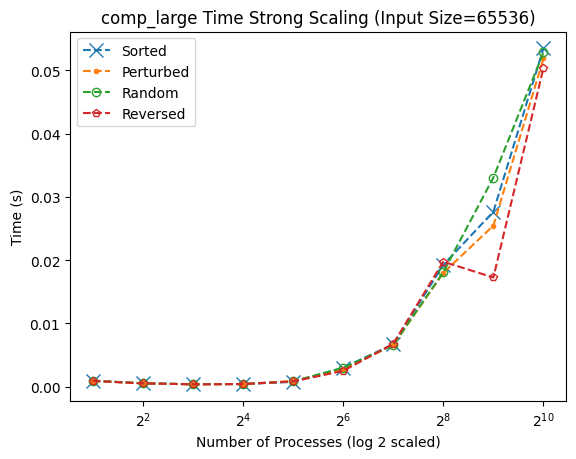

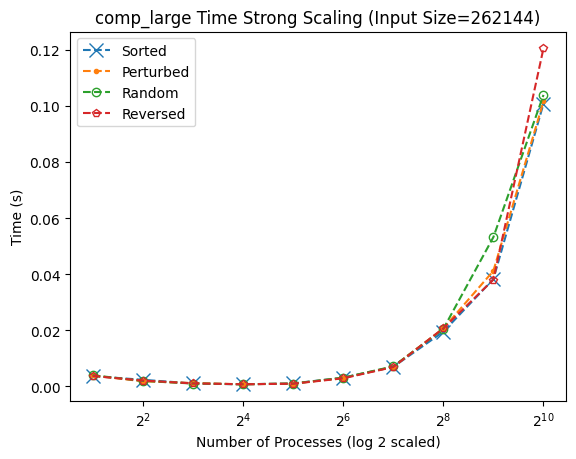

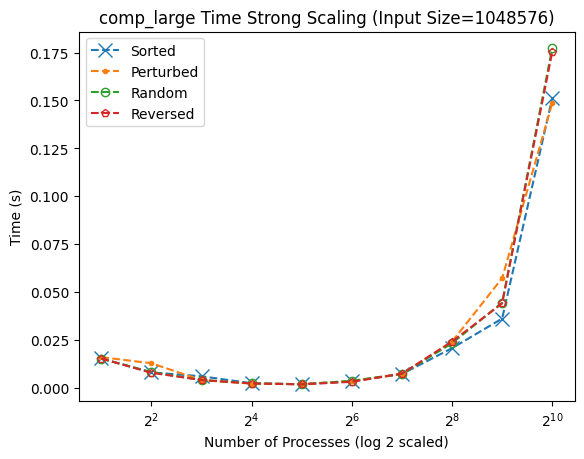

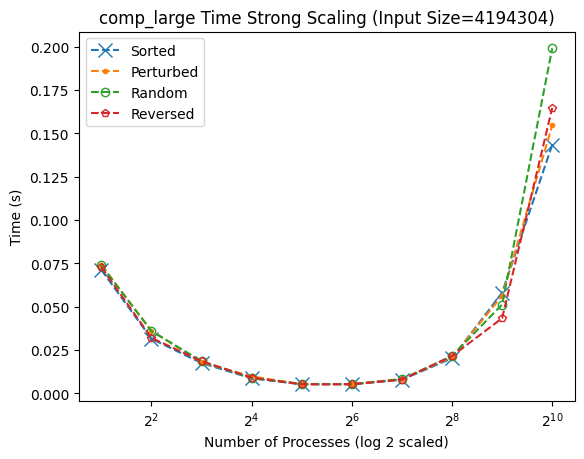

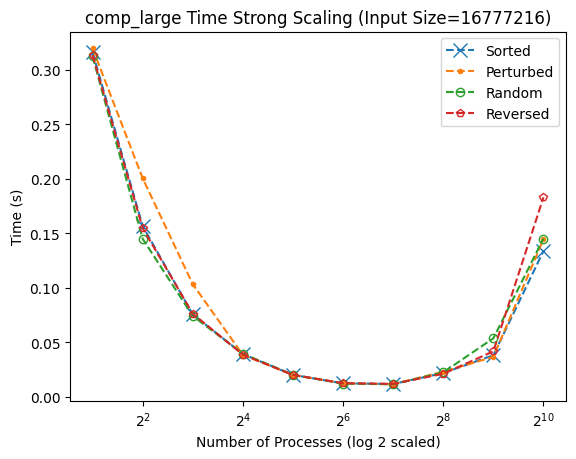

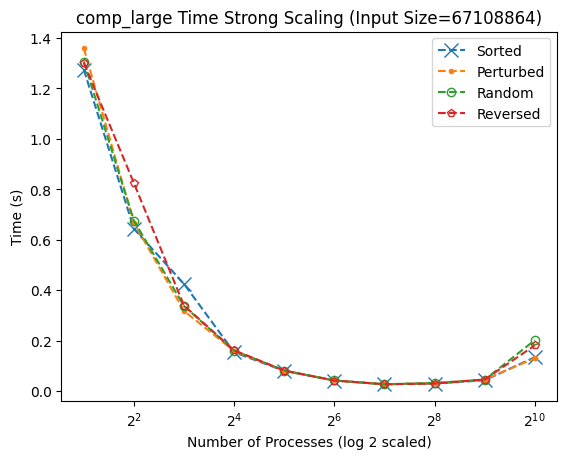

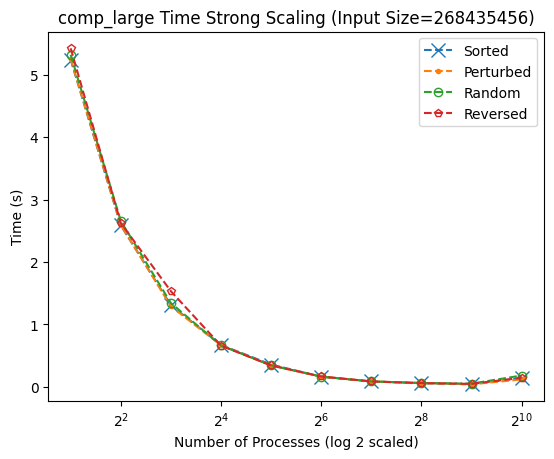

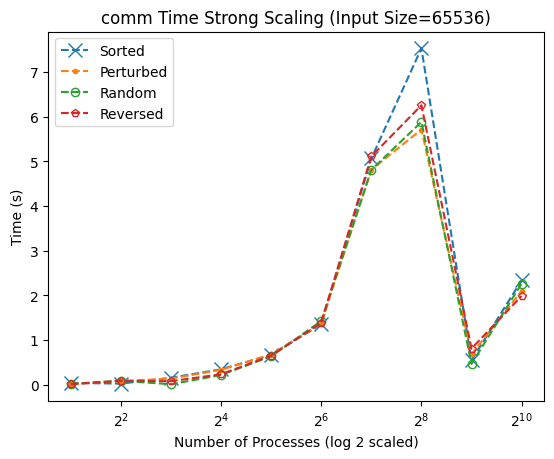

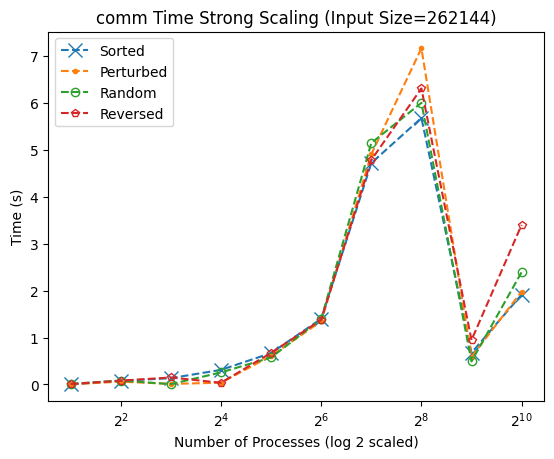

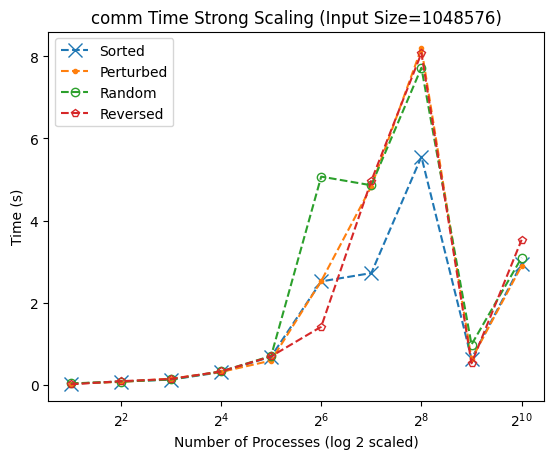

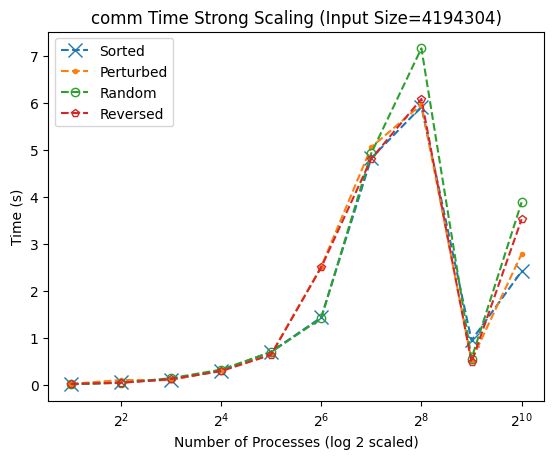

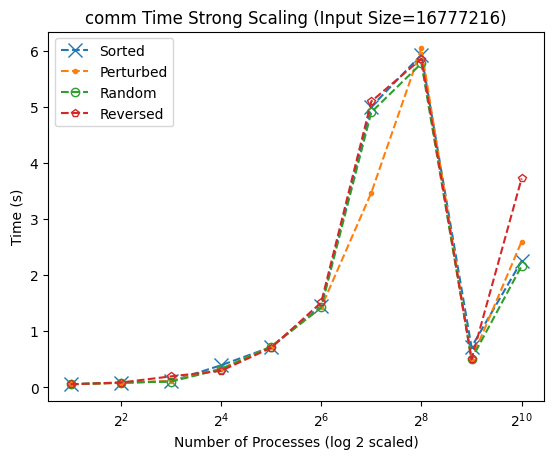

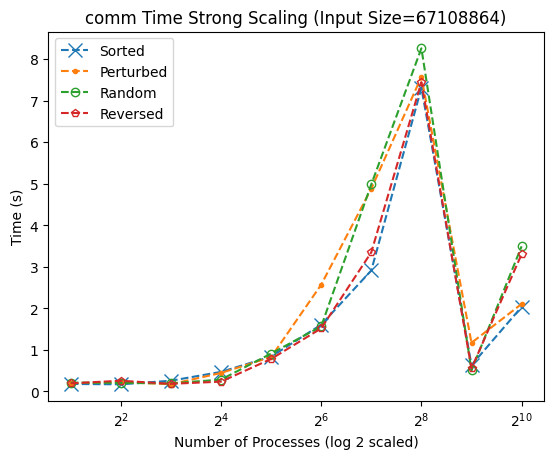

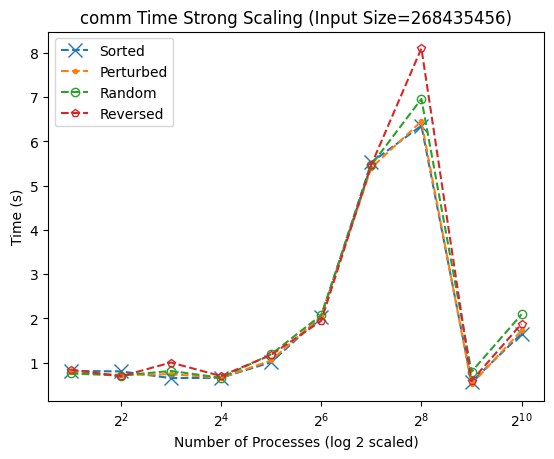

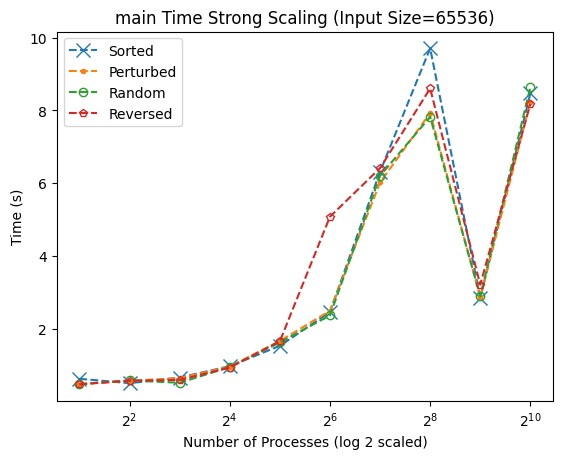

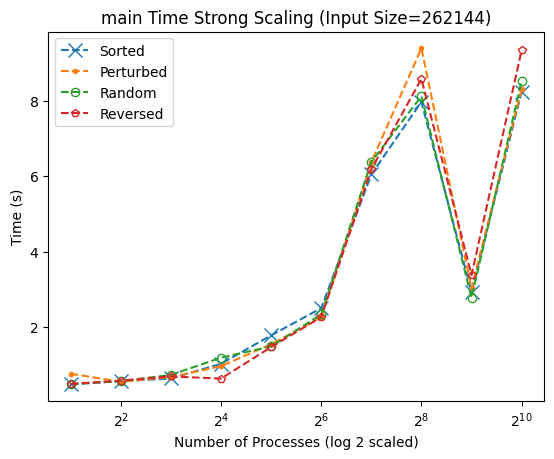

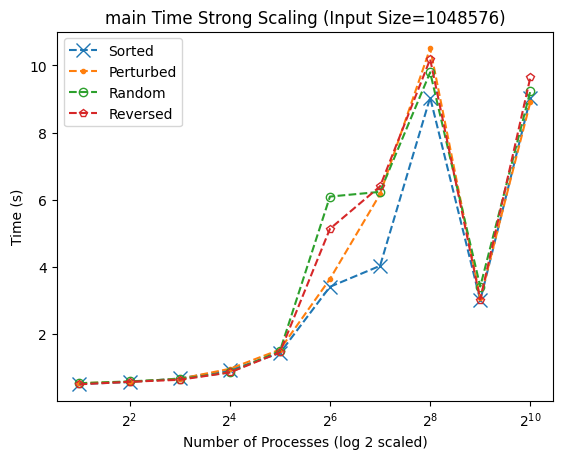

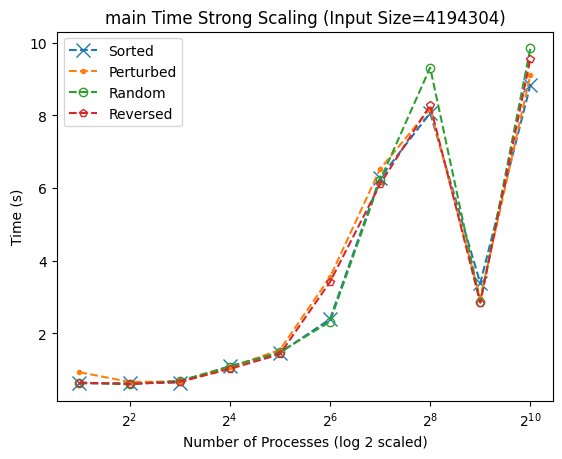

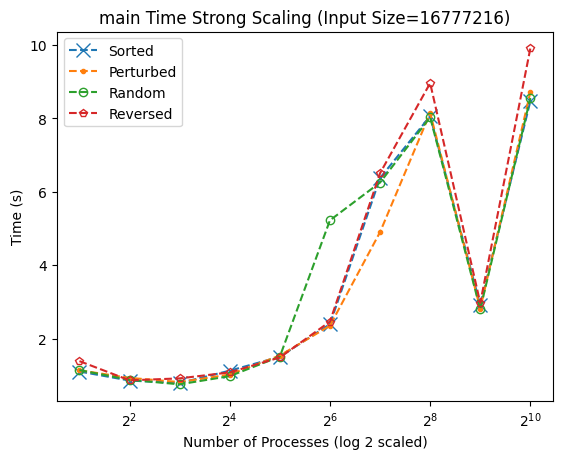

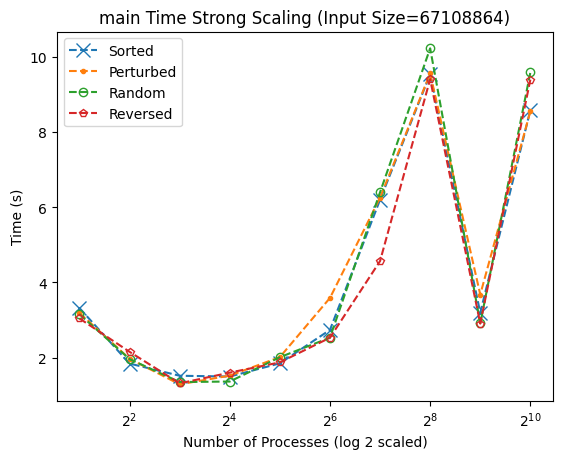

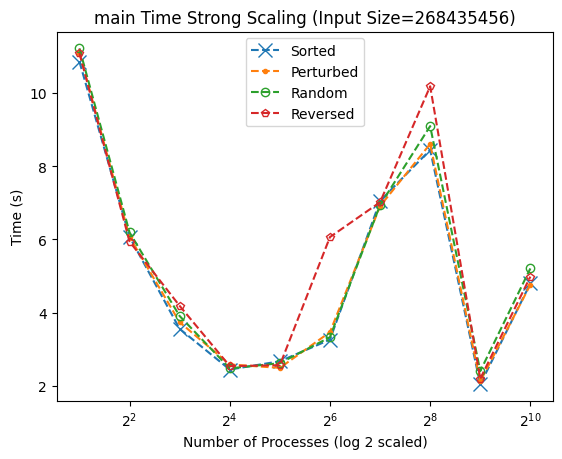

In [ ]:
import numpy as np
from copy import deepcopy

sub_data = data.groupby(["input_size", "num_procs", "input_type"])

input_sizes = [2**x for x in (16, 18, 20, 22, 24, 26, 28)]
num_procs = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
levels = { "Sorted": [], "Perturbed":[], "Random":[], "Reversed":[] }
ys_time = {node : {size: deepcopy(levels) for size in input_sizes} for node in node_strings}

for cols, thic in sub_data.items():
   for node_string in node_strings:
      
      node = thic.get_node(node_string)
      sort_level = thic.dataframe.loc[node, "input_type"].values[0]
      sort_level = int_to_string[sort_level]
      x_proc = int(thic.dataframe.loc[node, "num_procs"].values.flatten()[0])
      inp_size = int(thic.dataframe.loc[node, "input_size"].values.flatten()[0])
      
      y_avg = float(thic.dataframe.loc[node, "Avg time/rank"].values.flatten()[0])

      ys_time[node_string][inp_size][sort_level].append(y_avg)

for node_string in node_strings:
   for inp_size in input_sizes:
      y_sort = ys_time[node_string][inp_size]["Sorted"]
      y_pert = ys_time[node_string][inp_size]["Perturbed"]
      y_rand = ys_time[node_string][inp_size]["Random"]
      y_rev = ys_time[node_string][inp_size]["Reversed"]
      plot_runtimes(num_procs, [y_sort, y_pert, y_rand, y_rev],
                    ["Sorted", "Perturbed", "Random", "Reversed"],
                    node_string, f"{node_string}-{inp_size}-strong", inp_size)
   

## Experiment 2 - Strong Scaling Speedup

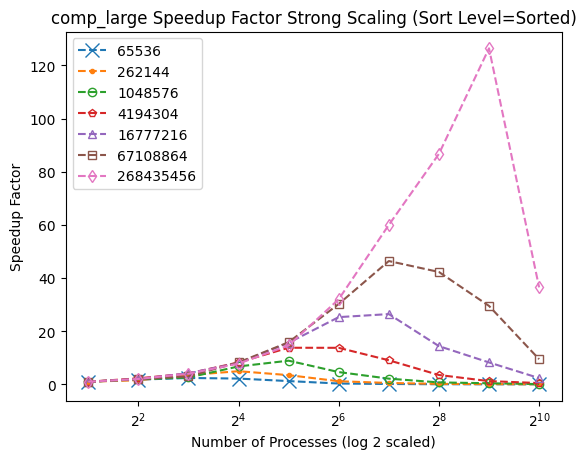

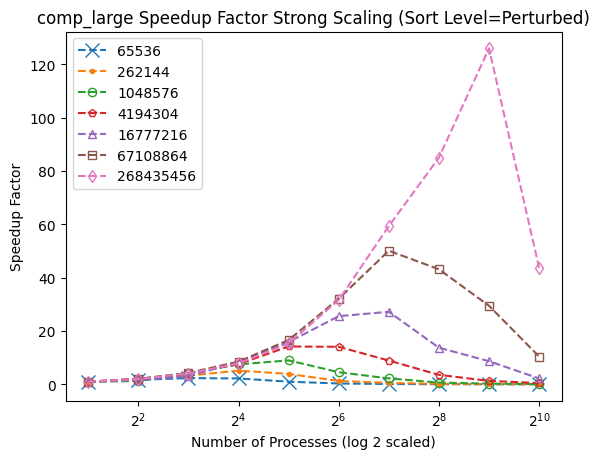

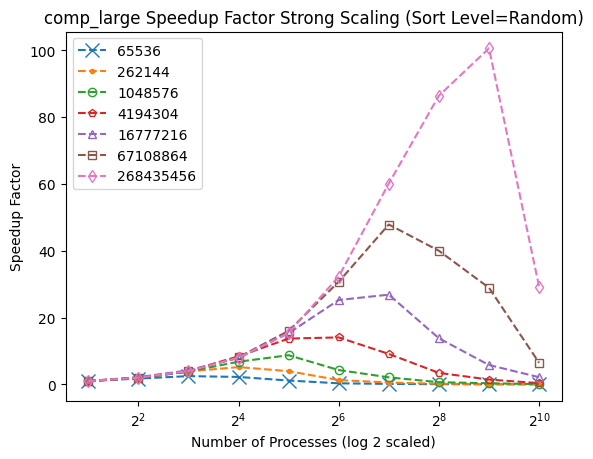

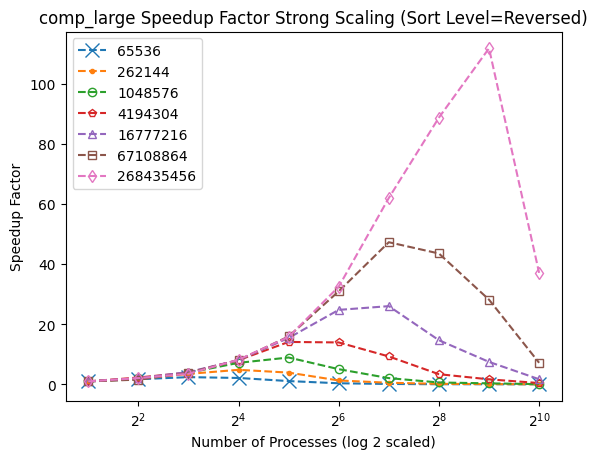

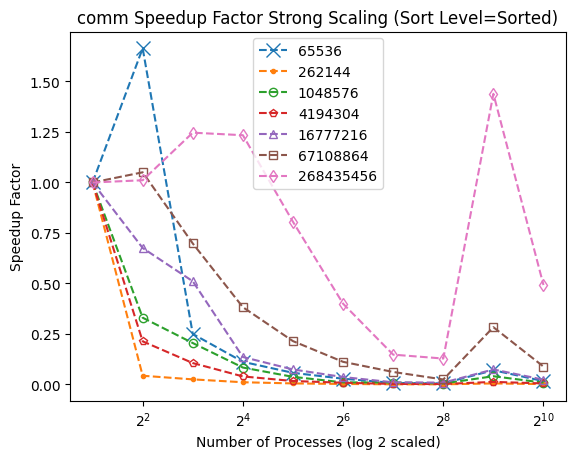

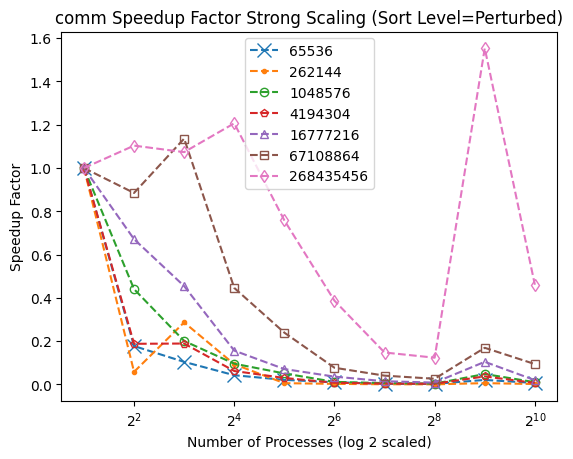

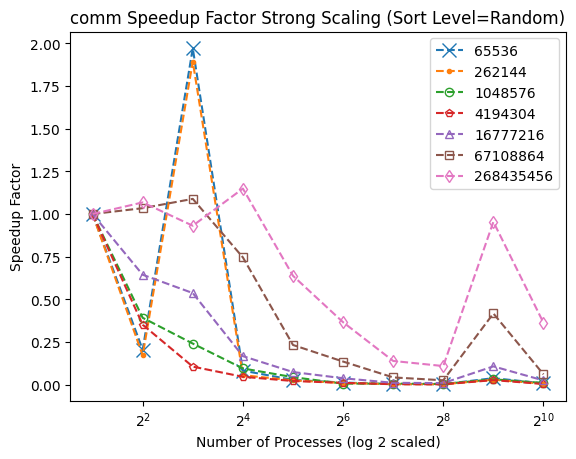

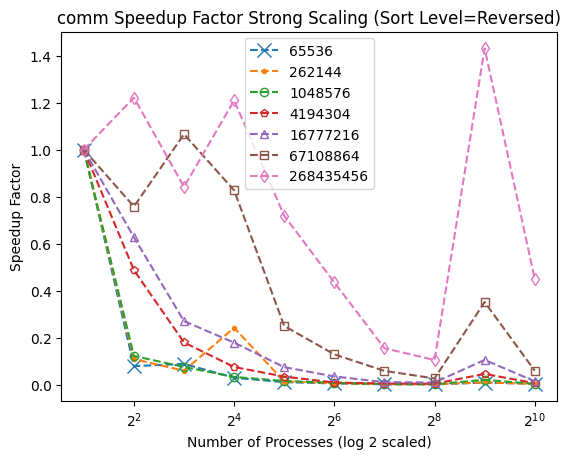

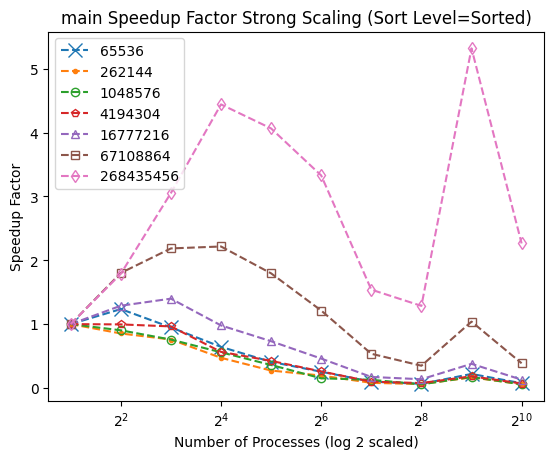

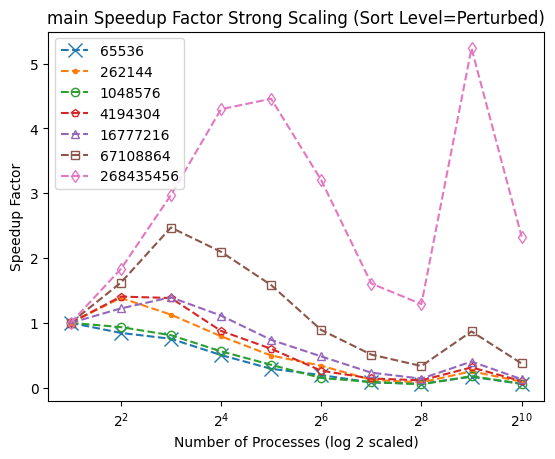

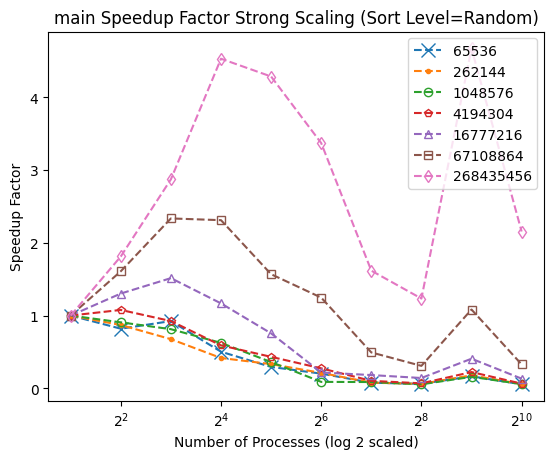

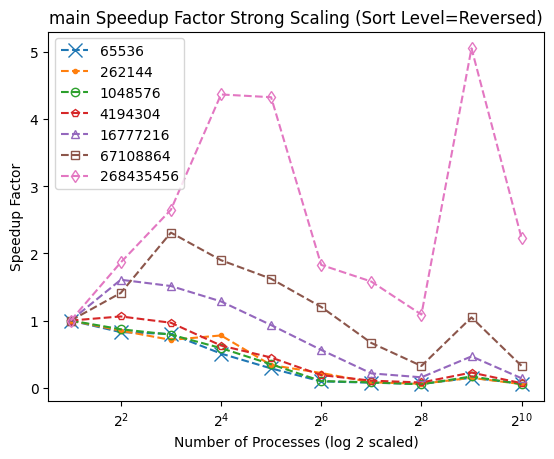

In [339]:
for node in node_strings:
    for level in levels.keys():
        input_sizes = list(ys_time[node].keys())
        y_scaling = []
        for inp_size in input_sizes:
            runtimes = ys_time[node][inp_size][level]
            speedup = [runtimes[0]/x for x in runtimes]
            y_scaling.append(speedup)
        plot_speedup(num_procs, y_scaling, input_sizes, node, level, f"{node}-{level}-speedup")
        
        

## Experiment 3 - Weak Scaling: Vary Num Procs and Num Elements

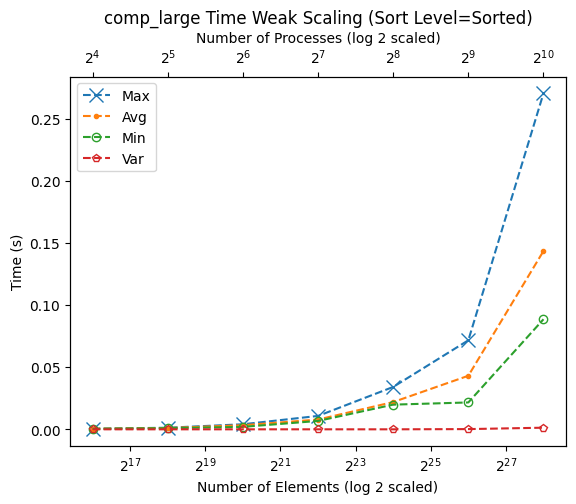

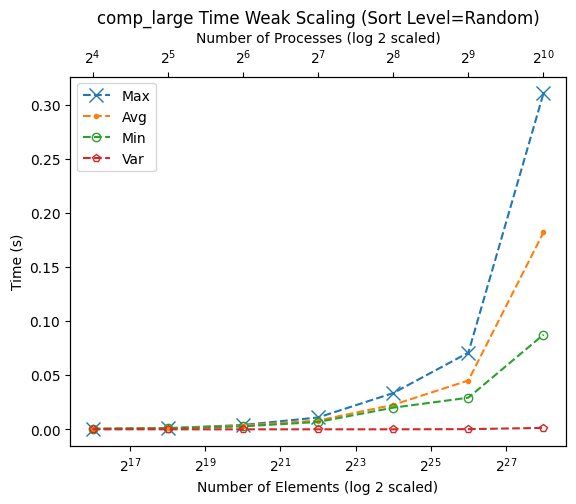

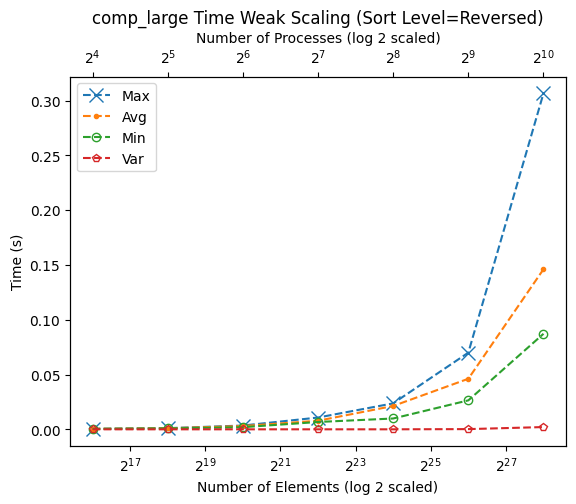

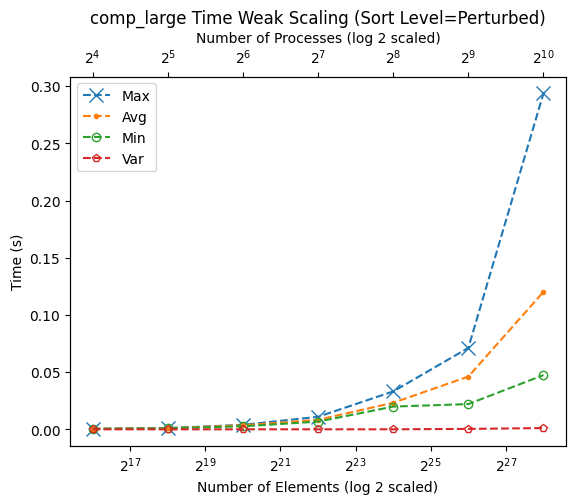

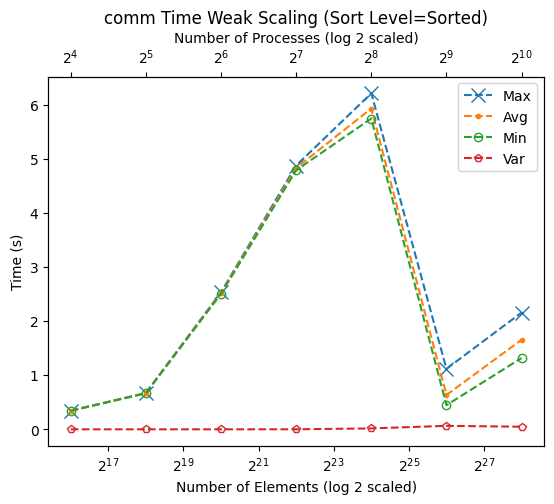

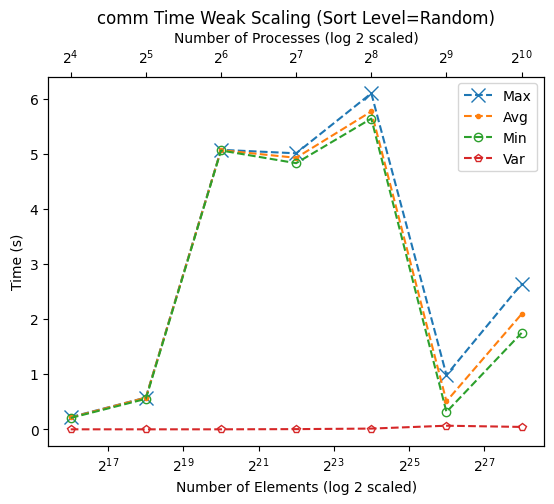

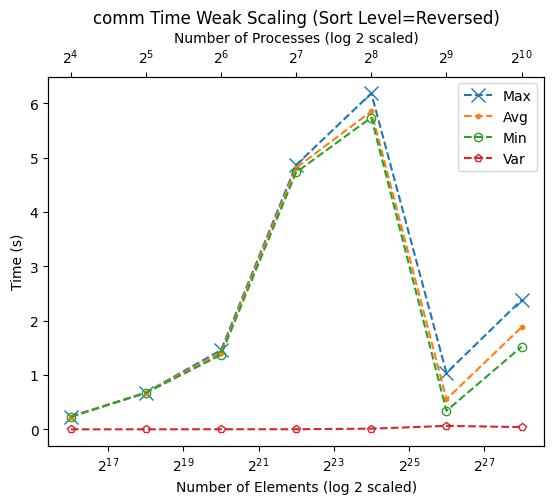

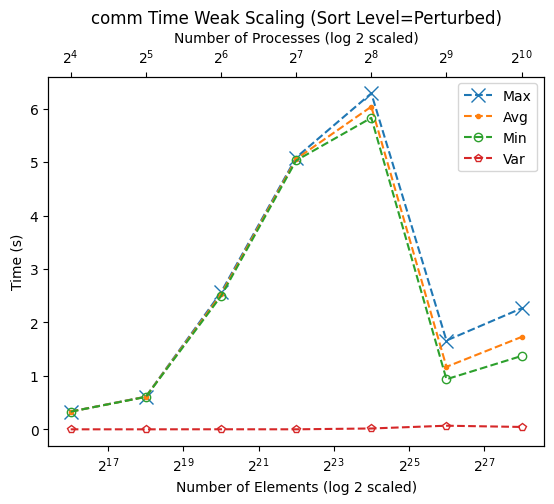

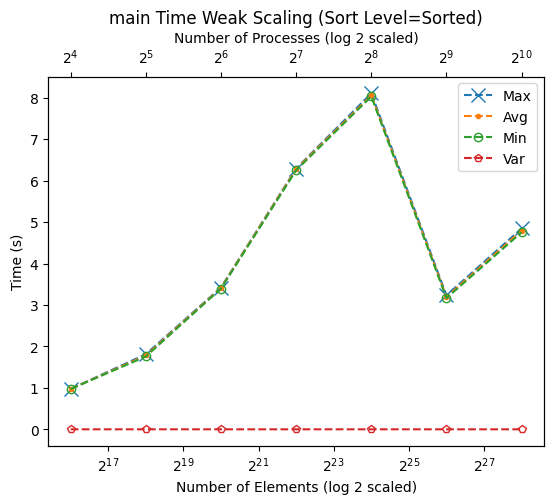

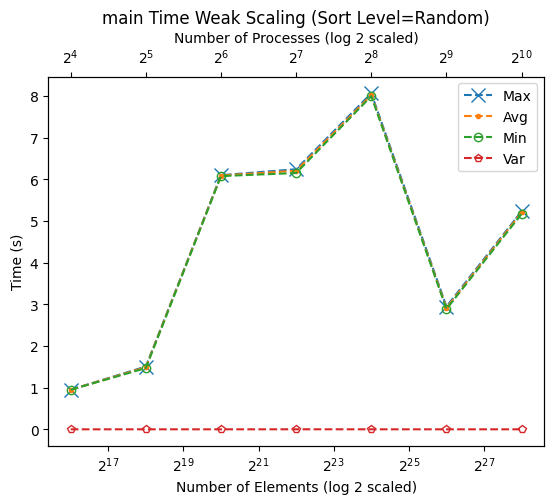

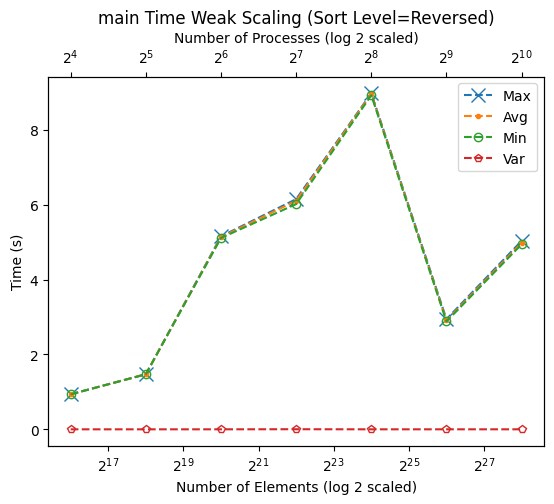

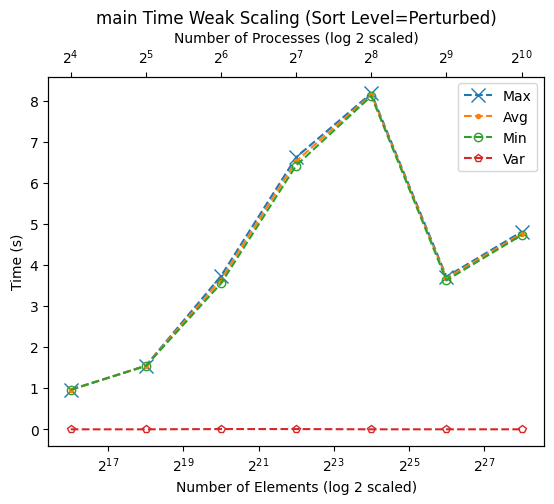

In [340]:
import numpy as np
from itertools import product
from copy import deepcopy

sub_data = data.groupby(["input_size", "num_procs", "input_type"])
allowed_procs = [16, 32, 64, 128, 256, 512, 1024]
allowed_elems = [2**x for x in (16, 18, 20, 22, 24, 26, 28)]
allowed_combs = list(zip(allowed_procs, allowed_elems))

metrics = { "Max": [], "Avg": [], "Min": [], "Var": [] }
levels = { "Sorted", "Perturbed", "Random", "Reversed" }
ys = {node : {level: deepcopy(metrics) for level in levels} for node in node_strings}

for cols, thic in sub_data.items():
   for node_string in node_strings:
      
      node = thic.get_node(node_string)
      sort_level = thic.dataframe.loc[node, "input_type"].values[0]
      sort_level = int_to_string[sort_level]
      x_proc = int(thic.dataframe.loc[node, "num_procs"].values.flatten()[0])
      x_size = int(thic.dataframe.loc[node, "input_size"].values.flatten()[0])
      
      if ((x_proc, x_size) not in allowed_combs):
         continue
      
      y_max = float(thic.dataframe.loc[node, "Max time/rank"].values.flatten()[0])
      y_avg = float(thic.dataframe.loc[node, "Avg time/rank"].values.flatten()[0])
      y_min = float(thic.dataframe.loc[node, "Min time/rank"].values.flatten()[0])
      y_var = float(thic.dataframe.loc[node, "Variance time/rank"].values.flatten()[0])
      
      
      ys[node_string][sort_level]["Max"].append(y_max)
      ys[node_string][sort_level]["Avg"].append(y_avg)
      ys[node_string][sort_level]["Min"].append(y_min)
      ys[node_string][sort_level]["Var"].append(y_var)
   

for node_string in node_strings:
   for level in levels:
      y_max = ys[node_string][level]["Max"]
      y_avg = ys[node_string][level]["Avg"]
      y_min = ys[node_string][level]["Min"]
      y_var = ys[node_string][level]["Var"]
      plot_runtimes_weak(allowed_procs, allowed_elems, [y_max, y_avg, y_min, y_var], 
                        ["Max", "Avg", "Min", "Var"], node_string, level, f"{node_string}-{level}-weak")
